# COMM7370 AI Theories and Applications
# Search Algorithms

# Exercise 3 (5%)
## The Game of Thrones Dataset
In this exercise we will use the Games of Thrones dataset provided in a separate file (`\data\gameOfThrones-book1.csv`).
This graph represents the interactions between the characters in the first book.

# Part 1
Load the dataset in NetWorkX.

In [4]:
import sys
!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [6]:
dfpower = pd.read_csv('../data/gameOfThrones-book1.csv')

In [7]:
dfpower.fillna(0, inplace=True)
dfpower.columns=['Source','Target','Weight']

In [8]:
dfpower

Source              Target  Weight
0                     Addam-Marbrand     Jaime-Lannister       3
1                     Addam-Marbrand     Tywin-Lannister       6
2                  Aegon-I-Targaryen  Daenerys-Targaryen       5
3                  Aegon-I-Targaryen        Eddard-Stark       4
4    Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne       4
5    Aemon-Targaryen-(Maester-Aemon)         Bowen-Marsh       4
6    Aemon-Targaryen-(Maester-Aemon)               Chett       9
7    Aemon-Targaryen-(Maester-Aemon)              Clydas       5
8    Aemon-Targaryen-(Maester-Aemon)        Jeor-Mormont      13
9    Aemon-Targaryen-(Maester-Aemon)            Jon-Snow      34
10   Aemon-Targaryen-(Maester-Aemon)       Samwell-Tarly       5
11                Aerys-II-Targaryen       Brandon-Stark       4
12                Aerys-II-Targaryen        Eddard-Stark      10
13                Aerys-II-Targaryen    Gerold-Hightower       3
14                Aerys-II-Targaryen     Jaime-Lannister       5
15                Aerys-II-Targaryen           Jon-Arryn       3
16                Aerys-II-Targaryen    Robert-Baratheon      12
17                              Aggo  Daenerys-Targaryen      11
18                              Aggo               Drogo       6
19                              Aggo               Jhogo       4
20                              Aggo       Jorah-Mormont       5
21                              Aggo               Quaro       3
22                              Aggo             Rakharo       7
23                            Albett              Halder       3
24                            Albett            Jon-Snow       5
25                            Albett                Rast       3
26                    Alliser-Thorne         Bowen-Marsh       3
27                    Alliser-Thorne               Grenn       3
28                    Alliser-Thorne              Halder       4
29                    Alliser-Thorne        Jeor-Mormont      10
..                               ...                 ...     ...
654                    Rodrik-Cassel       Theon-Greyjoy       6
655                    Rodrik-Cassel    Tyrion-Lannister      10
656                    Rodrik-Cassel         Willis-Wode       7
657                     Roose-Bolton     Tywin-Lannister       4
658                   Sandor-Clegane         Sansa-Stark      23
659                   Sandor-Clegane    Tyrion-Lannister       5
660                      Sansa-Stark   Stannis-Baratheon       3
661                      Sansa-Stark              Tomard       3
662                      Sansa-Stark    Tyrion-Lannister       3
663                      Sansa-Stark               Varys       4
664                             Shae    Tyrion-Lannister      12
665                           Shagga              Timett       4
666                           Shagga    Tyrion-Lannister      17
667                           Shagga     Ulf-son-of-Umar       4
668                Stannis-Baratheon     Tywin-Lannister       4
669                Stannis-Baratheon               Varys       5
670                     Stevron-Frey         Walder-Frey       3
671                    Theon-Greyjoy    Tyrion-Lannister       3
672                    Theon-Greyjoy     Tywin-Lannister       3
673                    Theon-Greyjoy         Walder-Frey       4
674                           Timett    Tyrion-Lannister       3
675                 Tommen-Baratheon    Tyrion-Lannister       3
676                 Tyrion-Lannister     Tywin-Lannister      40
677                 Tyrion-Lannister         Vardis-Egen       9
678                 Tyrion-Lannister               Varys       3
679                 Tyrion-Lannister         Willis-Wode       4
680                 Tyrion-Lannister               Yoren      10
681                  Tywin-Lannister               Varys       4
682                  Tywin-Lannister         Walder-Frey       8
683                     Waymar-Royce     Will-(prologue)      18


In [9]:
powerMap = nx.from_pandas_edgelist(dfpower,'Source','Target',['Weight'])

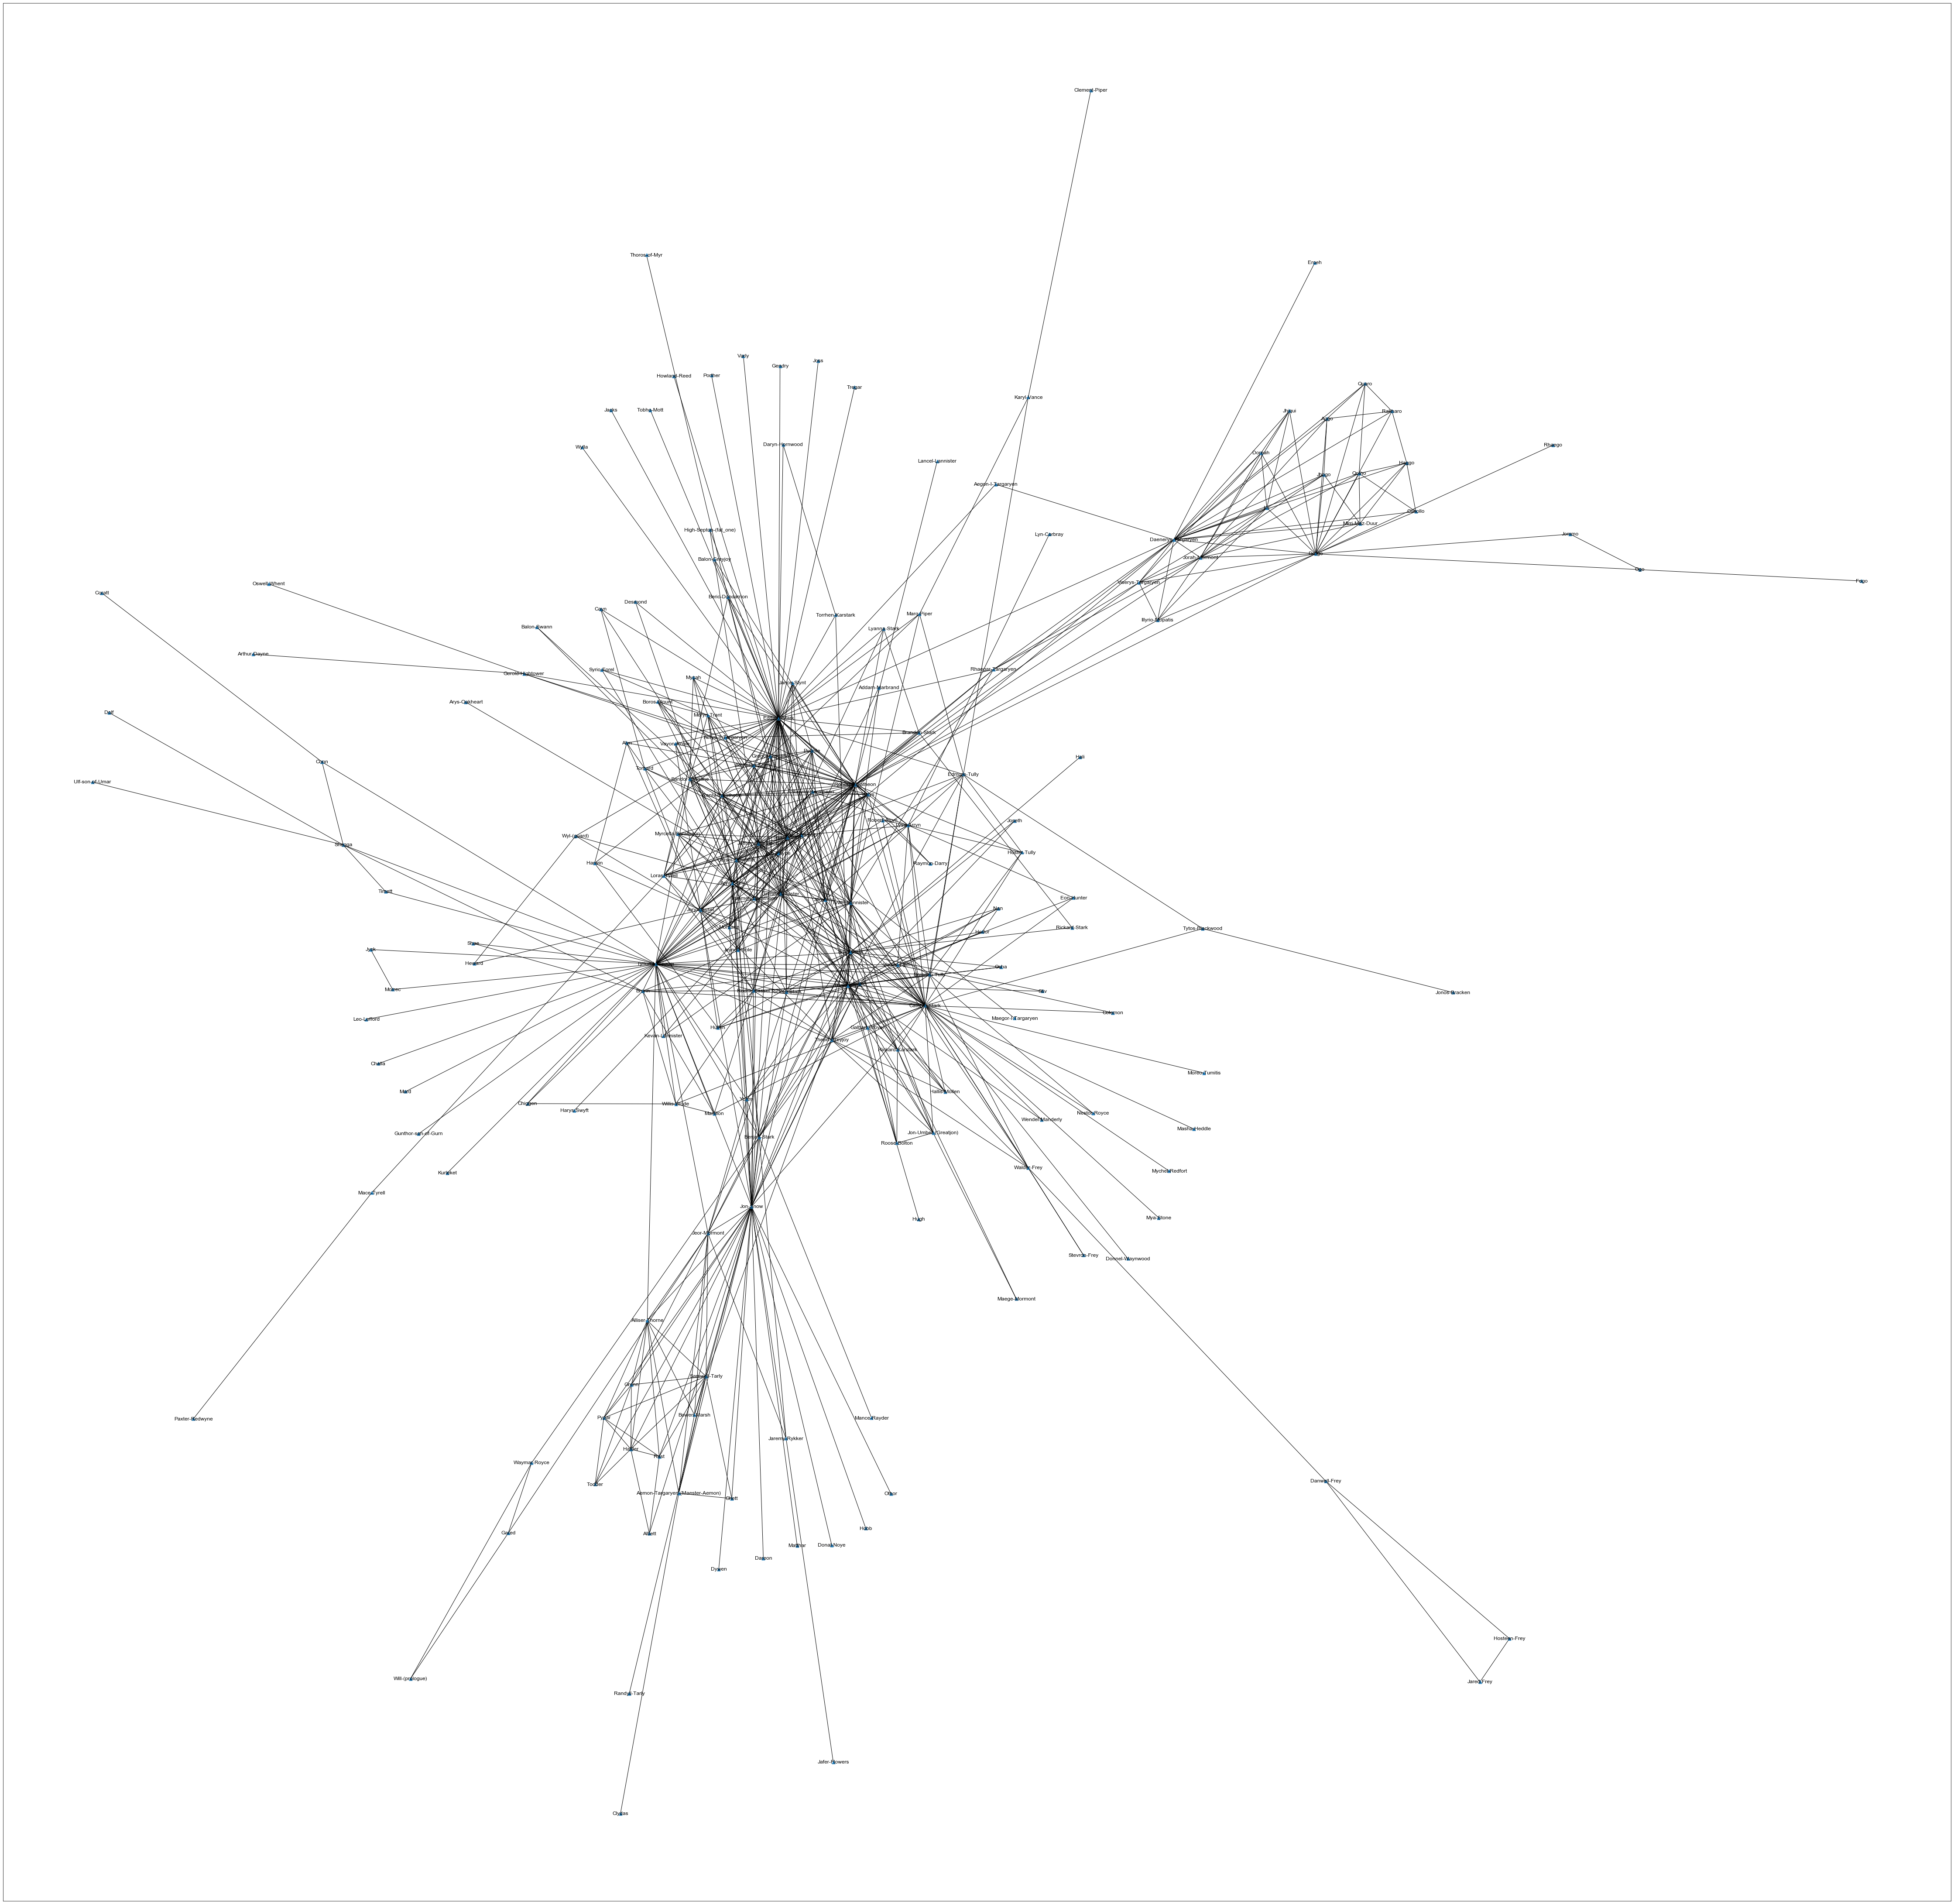

In [10]:
layout=nx.spring_layout(powerMap)
plt.figure(figsize=(80,80))
nx.draw_networkx(powerMap, layout, node_shape='^', node_size = 50, with_labels=True)

# Part 2
Search a path in the graph to send a message from Jon-Snow to Drogo.

Use the `DFS` search or `Improved DFS`, reporting the total number of steps needed.

*Bonus:* report the weight of the path.

In [11]:
def DFS_with_loop_prevention(graph, startNode, endNode, maxSteps):
    # Initialization
    # Use visited flag on each node to find if we should consider it for fring expansion
    fringe = []
    step = 0
    step_distance = 0 
    total_distance = 0 
    
    for node in graph.nodes:
        graph.nodes[node]['parent'] = False
        graph.nodes[node]['visited'] = False
    
    for edge in graph.edges:
        graph.edges[edge]['visited'] = False
        
    # Setup starting point, root of the tree
    fringe.append(startNode)
    graph.nodes[startNode]['parent'] = None
    #graph.nodes[startNode]['visited'] = True
    print(startNode, " -> ")
    
    # Execute until there are nodes to be visited
    while fringe:
        print('Fringe:', fringe)
        
        #Extract a node from the fringe and visit the node
        currentNode = fringe.pop()
        if graph.nodes[currentNode]['visited'] == False: # Why this is needed????
            step += 1
            
            if not graph.nodes[currentNode]['parent'] == None: #the startNode 'Arab' has no 'parent'
                
                #use 'weight' of edge between currentNode and its parent node to represent the 'distance'
                step_distance = graph.edges[currentNode, graph.nodes[currentNode]['parent']]['Weight']
                print('From', graph.nodes[currentNode]['parent'],'to', currentNode,'| Weight:', step_distance)
                graph.edges[graph.nodes[currentNode]['parent'],currentNode]['visited'] = True
                #count the total distance
                total_distance = total_distance + step_distance
                
            else:
                print('No Parent Node')

            # Check goal
            if not(currentNode == endNode): 
                # Check condition
                if step <= maxSteps:
                    # Update the visited flag if needed
                    if(not graph.nodes[currentNode]['visited']):
                        print(currentNode, " -> ")
                        graph.nodes[currentNode]['visited'] = True

                    # Add to fringe neighbouring nodes, if not visited
                    for neighbour in graph.adj[currentNode]:
                        if not graph.nodes[neighbour]['visited']:
                            fringe.append(neighbour)
                            graph.nodes[neighbour]['parent'] = currentNode
                            
                else:
                    print(" Execution ended without reaching the goal")
                    print(' Total weight:',total_distance)
                    
                    break
            else:
                print(currentNode, " *GOAL* - Number of steps:", step)
                print(' Total weight:',total_distance)
                
                break
        
    print(" - End")
    return graph

In [12]:
visited = DFS_with_loop_prevention(powerMap, 'Jon-Snow', 'Drogo', 100)

Jon-Snow  -> 
Fringe: ['Jon-Snow']
No Parent Node
Jon-Snow  -> 
Fringe: ['Aemon-Targaryen-(Maester-Aemon)', 'Albett', 'Alliser-Thorne', 'Arya-Stark', 'Benjen-Stark', 'Bowen-Marsh', 'Bran-Stark', 'Catelyn-Stark', 'Cersei-Lannister', 'Chett', 'Dareon', 'Donal-Noye', 'Dywen', 'Eddard-Stark', 'Grenn', 'Halder', 'Hobb', 'Jaremy-Rykker', 'Jeor-Mormont', 'Joffrey-Baratheon', 'Jory-Cassel', 'Luwin', 'Matthar', 'Mordane', 'Othor', 'Pypar', 'Rast', 'Rickon-Stark', 'Robb-Stark', 'Robert-Baratheon', 'Rodrik-Cassel', 'Samwell-Tarly', 'Sansa-Stark', 'Theon-Greyjoy', 'Todder', 'Tyrion-Lannister', 'Yoren']
From Jon-Snow to Yoren | Weight: 6
Yoren  -> 
Fringe: ['Aemon-Targaryen-(Maester-Aemon)', 'Albett', 'Alliser-Thorne', 'Arya-Stark', 'Benjen-Stark', 'Bowen-Marsh', 'Bran-Stark', 'Catelyn-Stark', 'Cersei-Lannister', 'Chett', 'Dareon', 'Donal-Noye', 'Dywen', 'Eddard-Stark', 'Grenn', 'Halder', 'Hobb', 'Jaremy-Rykker', 'Jeor-Mormont', 'Joffrey-Baratheon', 'Jory-Cassel', 'Luwin', 'Matthar', 'Mordane', 'Ot

In [13]:
visited.edges(data=True)

EdgeDataView([('Addam-Marbrand', 'Jaime-Lannister', {'Weight': 3, 'visited': False}), ('Addam-Marbrand', 'Tywin-Lannister', {'Weight': 6, 'visited': False}), ('Jaime-Lannister', 'Aerys-II-Targaryen', {'Weight': 5, 'visited': False}), ('Jaime-Lannister', 'Barristan-Selmy', {'Weight': 4, 'visited': False}), ('Jaime-Lannister', 'Brynden-Tully', {'Weight': 7, 'visited': False}), ('Jaime-Lannister', 'Catelyn-Stark', {'Weight': 9, 'visited': False}), ('Jaime-Lannister', 'Cersei-Lannister', {'Weight': 16, 'visited': False}), ('Jaime-Lannister', 'Eddard-Stark', {'Weight': 27, 'visited': False}), ('Jaime-Lannister', 'Edmure-Tully', {'Weight': 4, 'visited': False}), ('Jaime-Lannister', 'Galbart-Glover', {'Weight': 3, 'visited': False}), ('Jaime-Lannister', 'Gregor-Clegane', {'Weight': 3, 'visited': False}), ('Jaime-Lannister', 'Harys-Swyft', {'Weight': 3, 'visited': False}), ('Jaime-Lannister', 'Joffrey-Baratheon', {'Weight': 12, 'visited': False}), ('Jaime-Lannister', 'Jon-Arryn', {'Weight': 5,

In [14]:
visited.nodes(data=True)

NodeDataView({'Addam-Marbrand': {'parent': 'Tywin-Lannister', 'visited': False}, 'Jaime-Lannister': {'parent': 'Robert-Baratheon', 'visited': False}, 'Tywin-Lannister': {'parent': 'Walder-Frey', 'visited': True}, 'Aegon-I-Targaryen': {'parent': False, 'visited': False}, 'Daenerys-Targaryen': {'parent': 'Jhiqui', 'visited': False}, 'Eddard-Stark': {'parent': 'Rhaegar-Targaryen', 'visited': False}, 'Aemon-Targaryen-(Maester-Aemon)': {'parent': 'Jon-Snow', 'visited': False}, 'Alliser-Thorne': {'parent': 'Tyrion-Lannister', 'visited': False}, 'Bowen-Marsh': {'parent': 'Jon-Snow', 'visited': False}, 'Chett': {'parent': 'Jon-Snow', 'visited': False}, 'Clydas': {'parent': False, 'visited': False}, 'Jeor-Mormont': {'parent': 'Robert-Baratheon', 'visited': False}, 'Jon-Snow': {'parent': None, 'visited': True}, 'Samwell-Tarly': {'parent': 'Jon-Snow', 'visited': False}, 'Aerys-II-Targaryen': {'parent': 'Robert-Baratheon', 'visited': False}, 'Brandon-Stark': {'parent': 'Robert-Baratheon', 'visited

# Bonus Part 3
Display full network, highlighting the visited edges.

In [15]:
# find out the visited nodes
nvied =[n[0] for n in visited.nodes(data=True) if n[1]['visited'] == True]
nnovi =[n[0] for n in visited.nodes(data=True) if n[1]['visited'] == False]
nvied

['Tywin-Lannister',
 'Jon-Snow',
 'Robert-Baratheon',
 'Jhogo',
 'Jorah-Mormont',
 'Quaro',
 'Rakharo',
 'Tyrion-Lannister',
 'Tomard',
 'Petyr-Baelish',
 'Rodrik-Cassel',
 'Sandor-Clegane',
 'Sansa-Stark',
 'Yoren',
 'Varys',
 'Theon-Greyjoy',
 'Willis-Wode',
 'Walder-Frey',
 'Stannis-Baratheon',
 'Haggo',
 'Qotho',
 'Irri',
 'Jhiqui',
 'Mirri-Maz-Duur',
 'Rhaegar-Targaryen',
 'Viserys-Targaryen']

In [17]:
#find out the visited edges 
evied =[(u,v) for (u,v,d) in visited.edges(data=True) if d['visited'] == True]
enovi =[(u,v) for (u,v,d) in visited.edges(data=True) if d['visited'] == False]
evied

[('Tywin-Lannister', 'Varys'),
 ('Tywin-Lannister', 'Walder-Frey'),
 ('Jon-Snow', 'Yoren'),
 ('Robert-Baratheon', 'Sandor-Clegane'),
 ('Robert-Baratheon', 'Viserys-Targaryen'),
 ('Drogo', 'Jhiqui'),
 ('Jhogo', 'Irri'),
 ('Jhogo', 'Mirri-Maz-Duur'),
 ('Jorah-Mormont', 'Qotho'),
 ('Jorah-Mormont', 'Rhaegar-Targaryen'),
 ('Quaro', 'Qotho'),
 ('Quaro', 'Rakharo'),
 ('Rakharo', 'Haggo'),
 ('Tyrion-Lannister', 'Willis-Wode'),
 ('Tyrion-Lannister', 'Yoren'),
 ('Tomard', 'Petyr-Baelish'),
 ('Tomard', 'Sansa-Stark'),
 ('Petyr-Baelish', 'Sandor-Clegane'),
 ('Rodrik-Cassel', 'Theon-Greyjoy'),
 ('Rodrik-Cassel', 'Willis-Wode'),
 ('Sansa-Stark', 'Stannis-Baratheon'),
 ('Varys', 'Stannis-Baratheon'),
 ('Theon-Greyjoy', 'Walder-Frey'),
 ('Haggo', 'Mirri-Maz-Duur'),
 ('Irri', 'Jhiqui'),
 ('Rhaegar-Targaryen', 'Viserys-Targaryen')]

(-1.0238297511610095,
 1.010432038960336,
 -1.0964021065278564,
 1.0076134359760534)

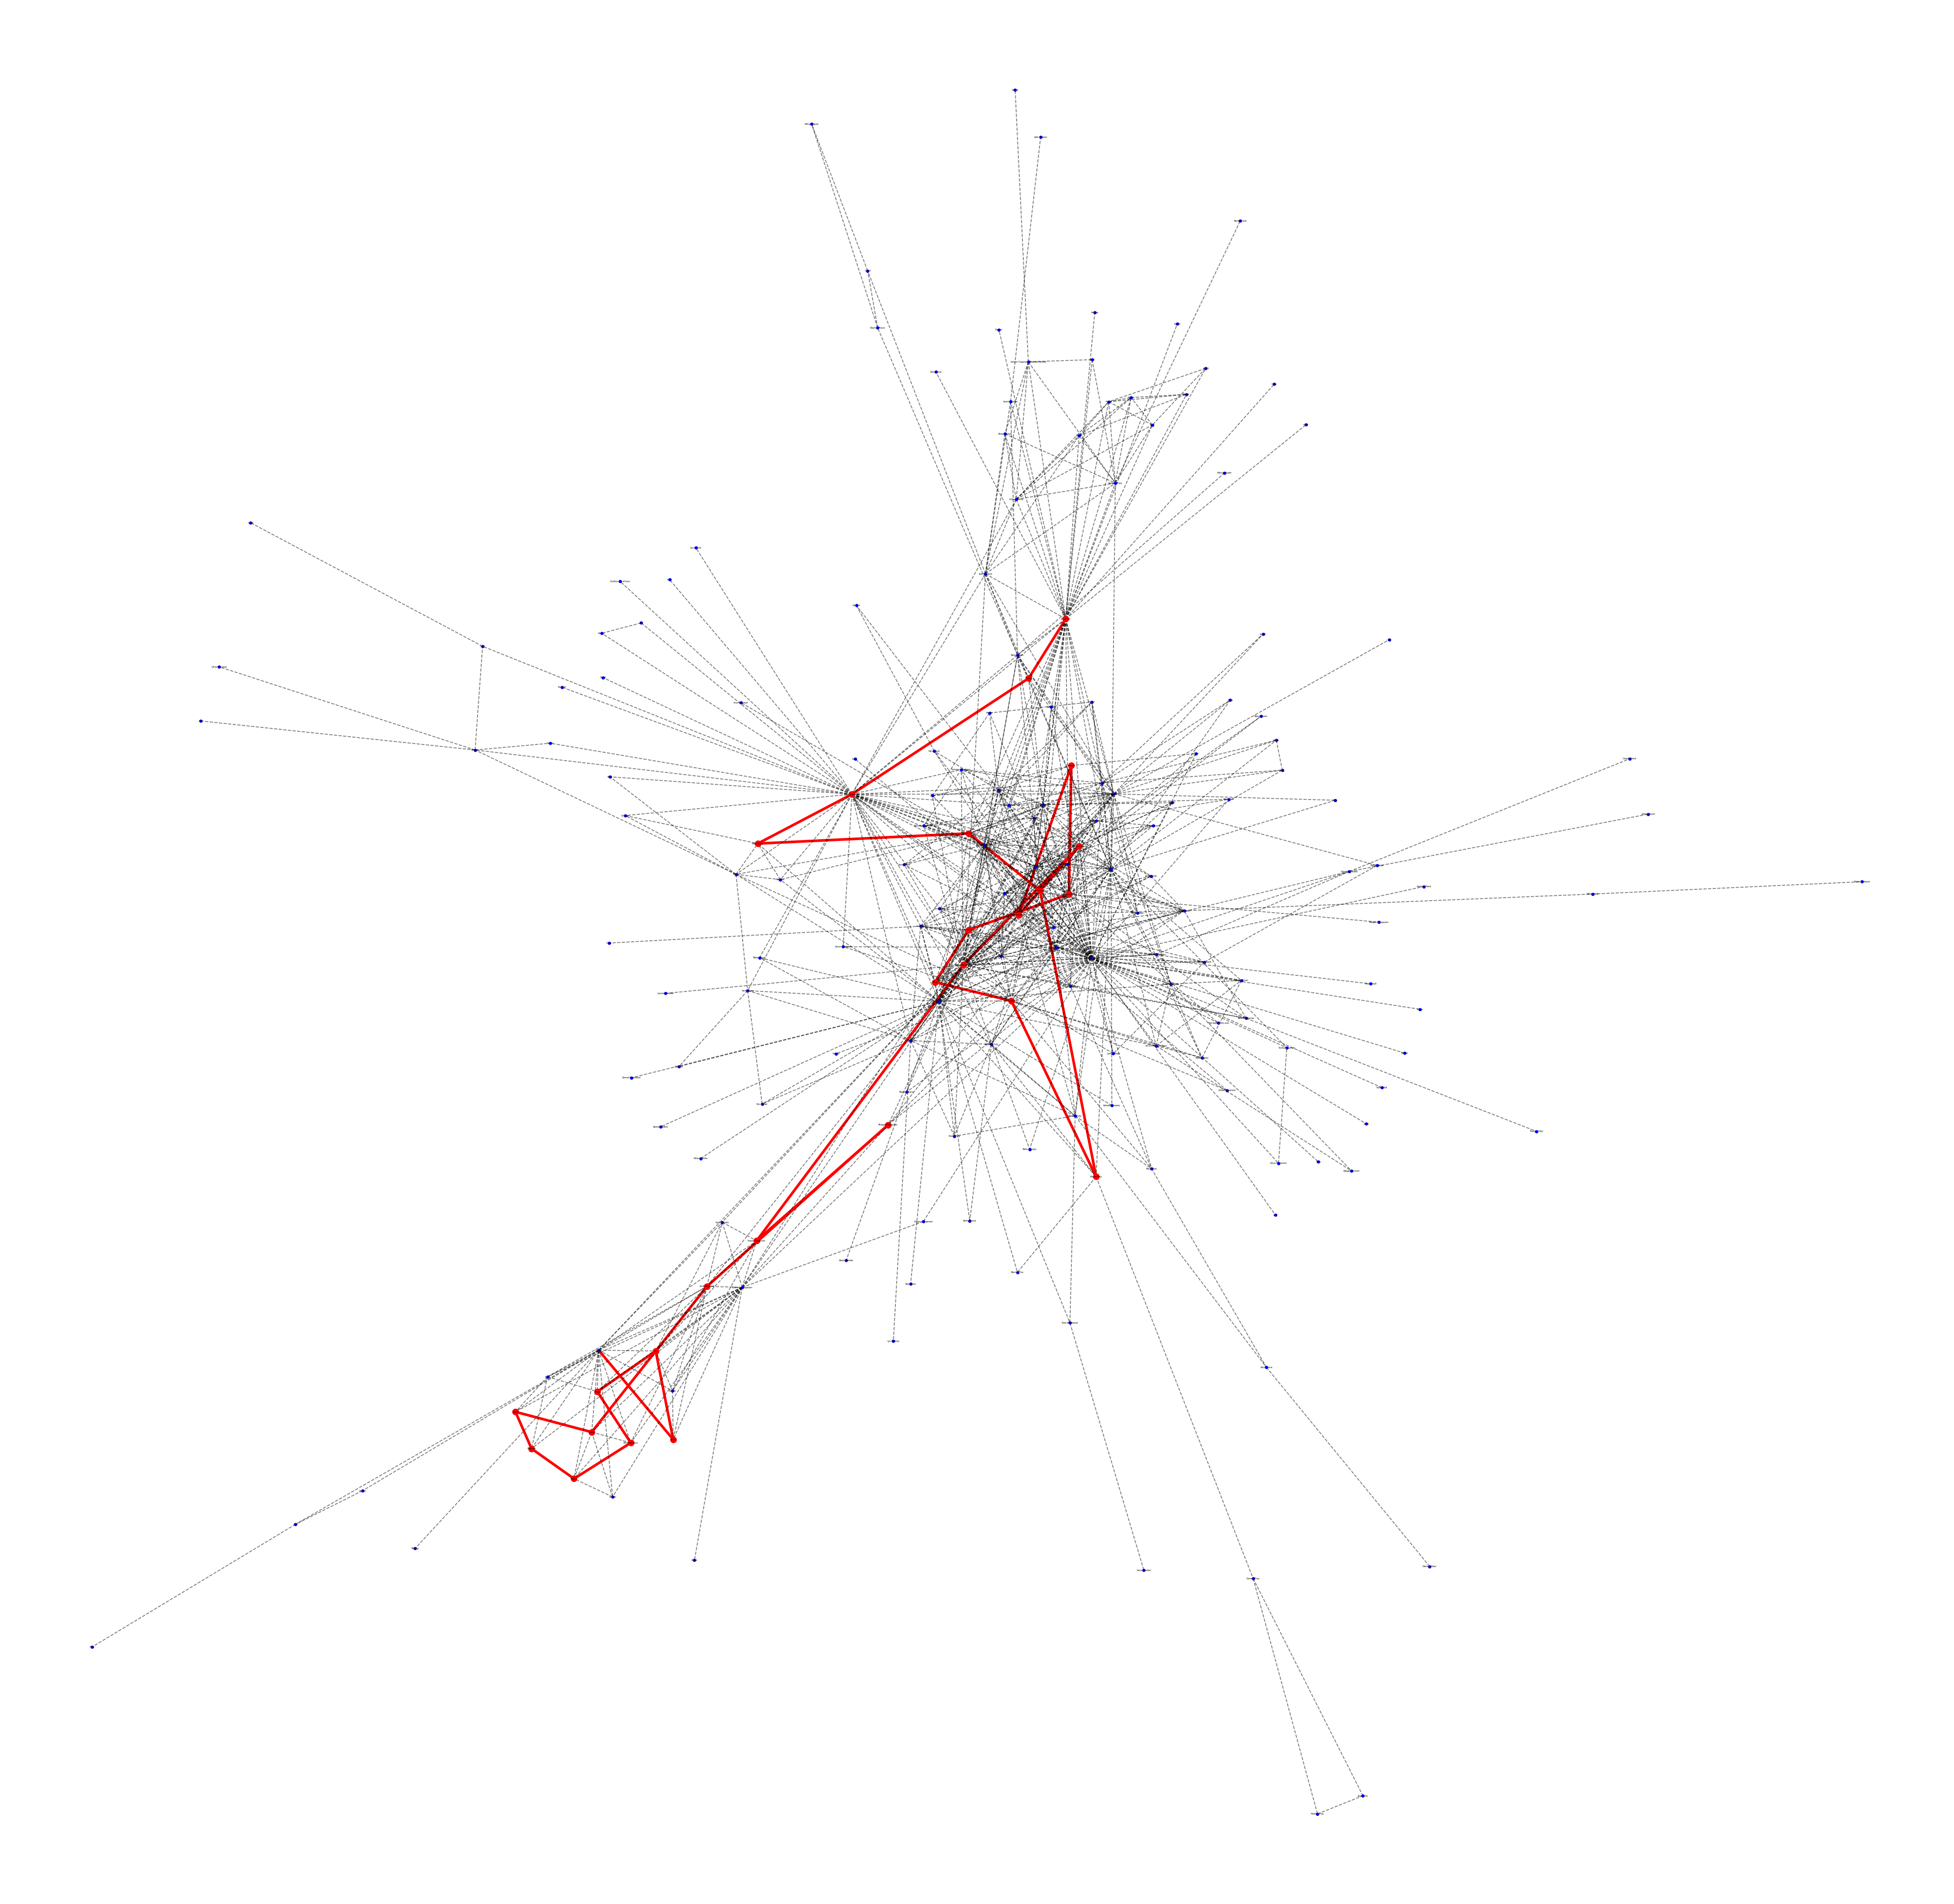

In [18]:
pos=nx.spring_layout(visited)
plt.figure(figsize=(80,80))
nx.draw_networkx_nodes(visited,pos,nodelist=nvied, node_size=200, node_color = 'red')
nx.draw_networkx_nodes(visited,pos,nodelist=nnovi, node_size=40, node_color = 'blue')
nx.draw_networkx_edges(visited,pos,edgelist=evied, width=6,edge_color='r')
nx.draw_networkx_edges(visited,pos,edgelist=enovi, width=2,alpha=0.5,style='dashed')
nx.draw_networkx_labels(visited,pos,font_size=5,font_family='sans-serif')

plt.axis('off')

- Course Instructor: Dr. Paolo Mengoni (Visiting Scholar, School of Communication, Hong Kong Baptist University) 
  - pmengoni@hkbu.edu.hk

- The codes in this notebook take insipiration from various sources. All codes are for educational purposes only and released under the CC1.0. 

- Game of Thrones Dataset source: https://github.com/mathbeveridge/asoiaf by Andrew Beveridge